### 图像梯度
图像梯度是用来求边界的，三种算子得到的效果图也不一样。  
【gradient形态学和二值化也可以得到图像的边界，可以将三者比较一下】

图像是二维的离散函数，所以最小逼近的单位为1.  
∴关于x的梯度为$Gx=f(x+1,y)-f(x,y)$, y的梯度为$Gy=f(x,y+1)-f(x,y)$  
二阶导数为: $x: f(x+1,y)+f(x-1,y)-2f(x,y), y: f(x,y+1)+f(x,y-1)-2f(x,y)$  
Opencv提供了三种不同的梯度滤波器：Sobel、Scharr和Laplacian算子。其中，Sobel其实就是求一阶或二阶导数；Scharr是对Sobel的优化；Laplacian是求二阶导数。  
梯度大小和方向的公式为：  
<center>$G=\sqrt{(G_x^2+G_y^2 )}$</center>
<center>$\theta=tan^{-1}(\frac{G_x}{G_y})$</center>
梯度的方向一般总是与边界垂直。梯度方向被归为四类：垂直，水平，和两个对角线。
<center><img src="pic/gradient.png" alt="FAO" width="200"></center>

### Sobel算子和Scharr算子
Sobel算子是高斯平滑和微分操作的结合体，所以它的抗噪声能力很好。

<center><img src="pic/Sobel.png" alt="FAO" width="300"></center>

如果ksize=-1，会使用3x3的Scharr滤波器，它的的效果要比3x3的Sobel滤波器好（而且速度相同，所以在使用3x3滤波器时应该尽量使用Scharr滤波器）。3x3的Scharr滤波器卷积核如下：

<center><img src="pic/Scharr.png" alt="FAO" width="300"></center>

### Laplacian算子
Laplacian算子的卷积核为：
<center><img src="pic/Laplacian.png" alt="FAO" width="150"></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
def imread(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

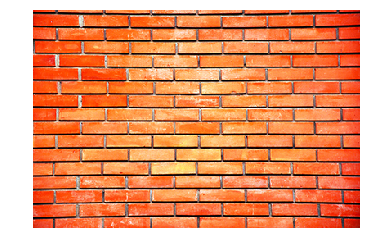

In [2]:
image = imread('./image/bricks.png')
show(image)

In [14]:
def gradient(image):
    '''用于求图像梯度'''
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(image, 
                       ddepth=cv2.CV_64F,    # 输出图像的深度（即数据类型），64为的float类型，因为梯度可正可负
                       dx=1, 
                       dy=0,    # 1,0是求x方向的梯度，0,1是求y方向的梯度
                       ksize=3
                      )
    sobely = cv2.Sobel(image,
                       ddepth=cv2.CV_64F,
                       dx=0,
                       dy=1,
                       ksize=3
                      )
    laplacian = cv2.Laplacian(image, ddepth=cv2.CV_64F)
    titles = ['original', 'sobelx', 'sobely', 'laplacian']
    images = [image, sobelx, sobely, laplacian]
    plt.figure(figsize=(15,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title(titles[i], color='green')
    plt.show()

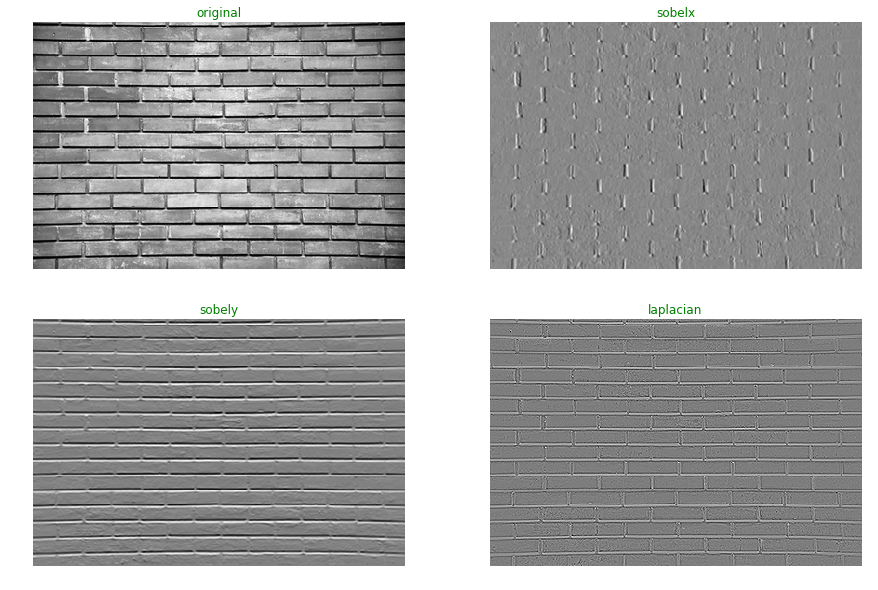

In [15]:
image = imread('./image/bricks.png')
gradient(image)

由上图可以看出，使用sobel算子时，x方向的梯度得到的是垂直边界；y方向的梯度得到的是水平边界；  
laplacian算子得到了整幅图的边界。

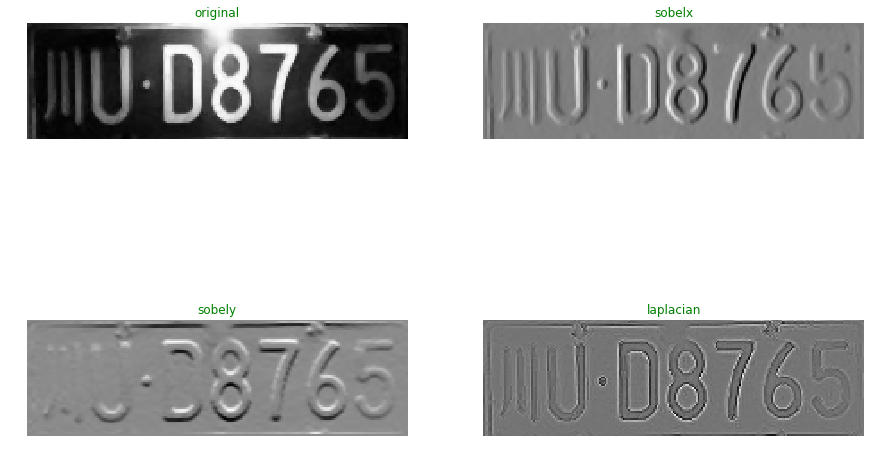

In [18]:
# 对车牌号的图片计算梯度
image = imread('./image/license_plate.png')
image = cv2.medianBlur(image, ksize=3)    # 最好是对灰度图进行中值平滑处理
gradient(image)

# 可以比较，个人觉得该效果还不如二值化的图清晰